In [10]:
import BudykoSellers
import emulator_utils
import numpy as np
import matplotlib.pyplot as plt
import run_all_exp
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use a LaTeX-compatible serif font
    "font.serif": ["Computer Modern Roman"],  # Or another LaTeX font
})

from emulator_utils import brewer2_light

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
def plot_box(experiments, scenarios, T_out, regions, save=False, fig_name=None):
  n_exp, n_scen, n_boxes = len(experiments), len(scenarios), len(regions)
  fig, ax = plt.subplots(n_exp, n_scen, figsize=(4*n_scen,4*n_exp), constrained_layout=True, sharex=True, sharey=True)

  for i, exp in enumerate(experiments):
    T_out_temp = T_out[exp]
    if i == 2:
      regions = ['Atmosphere','Ocean']
    for j, scen in enumerate(scenarios):
      T_true_temp = T_out_temp[scen].T
      n_boxes = T_true_temp.shape[1]
      for k in range(n_boxes):
        ax[i,j].plot(T_true_temp[:,k], lw=3, c=brewer2_light(k), label = regions[k])

      if j == 0:
        ax[i,j].legend(fontsize=20)
        ax[i,j].set_ylabel(r'Temperature [$^\circ$C]',fontsize=22)

      if i == n_exp - 1:
        ax[i,j].set_xlabel('Year',fontsize=24)

      # Add scenario names as row labels (test)
      if i == 0:
        for j, test_name in enumerate(scenarios):
          ax[i,j].set_title(test_name, fontsize=24, va="center")

      ax[i,j].tick_params(axis='both', which='major', labelsize=18)

  if save:
    plt.savefig(f'Figures/{fig_name}.pdf',dpi=500)

  return

### Run and plot all experiment

In [21]:
# Required variables
t_end, t_star = 251, 50
t = np.arange(0,t_end)
n_boxes = 3

# Initialize forcing vectors and run scenarios
experiments = ['3box_uncoup','3box_coup','2box_coup']
scenarios = ['2xCO2','High Emissions','Overshoot']
regions = ['High Lat. Ocean','Land','Low Lat. Ocean']
full_outputs, T_out = {}, {}
for i, exp in enumerate(experiments):
  T_out[exp] = {}

  n_boxes = run_all_exp.get_num_boxes(i)

  # Horizontally coupled vs. not
  if i == 1:
    diff_flag = 1
  else:
    diff_flag = 0

  # Vertically coupled vs not
  if i > 1:
    vert_diff_flag = 1
  else:
    vert_diff_flag = 0
  for j, scen in enumerate(scenarios):
    full_outputs[scen] = BudykoSellers.Run_Budyko_Sellers(scen_flag=j, n_boxes=n_boxes, diff_flag=diff_flag, vert_diff_flag=vert_diff_flag)
    T_out[exp][scen] = np.squeeze(full_outputs[scen]['T_ts'])[0:n_boxes,:]

/Users/chriswomack/Documents/PhD/Project 1/BudykoSellers.py:320: UserWarning: Simulation has not reached equilibirum (diseq > 1e-3 W m-2)
  warnings.warn('Simulation has not reached equilibirum (diseq > 1e-3 W m-2)')


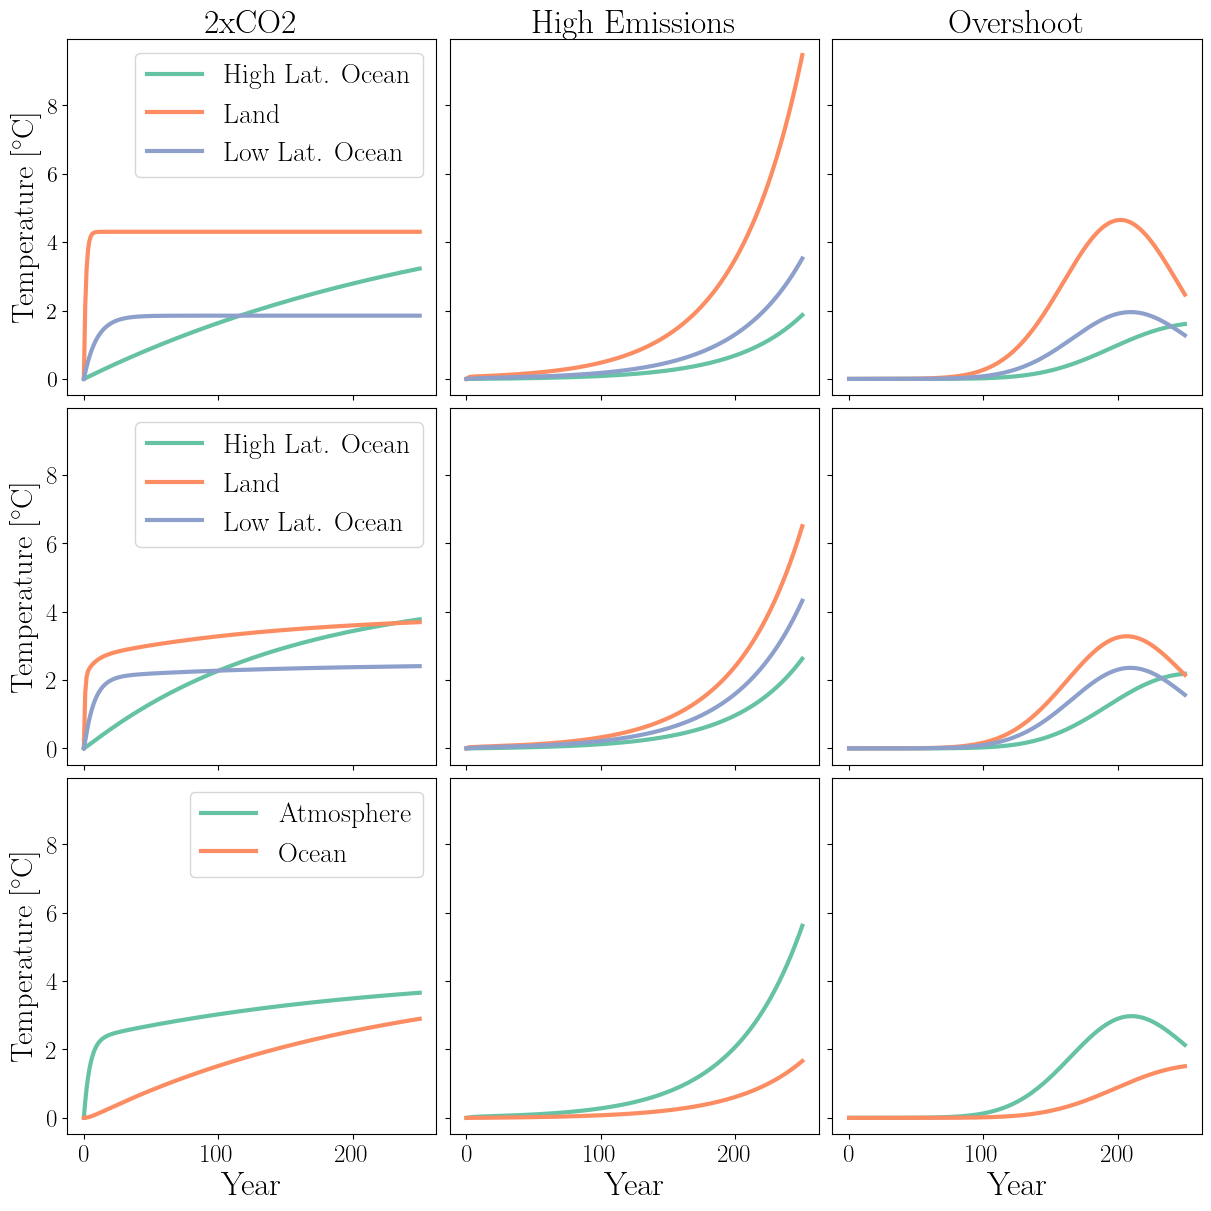

In [32]:
plot_box(experiments, scenarios, T_out, regions, save=True, fig_name='expBoxes_scens_v1')